In [1]:
input_dim = 5
model_file = "Model/model.cpkt"
num_clusters = 2

import json
import matplotlib.pyplot as plt
from matplotlib.path import Path
import numpy as np
import os
import pickle
import tensorflow as tf

import sys
sys.path.insert(0, "../Code/")
from base import load_encoder
from explain_sync import explain, apply

def load_model(input_dim = input_dim, model_file = model_file):
    return load_encoder(input_dim, model_file)


In [2]:
###
# Load Data & Configuration
###

x = pickle.load(open("data.pkl", "rb"))

with open("vertices.json") as json_file:  
    all_vertices = json.load(json_file)


INFO:tensorflow:Restoring parameters from Model/model.cpkt


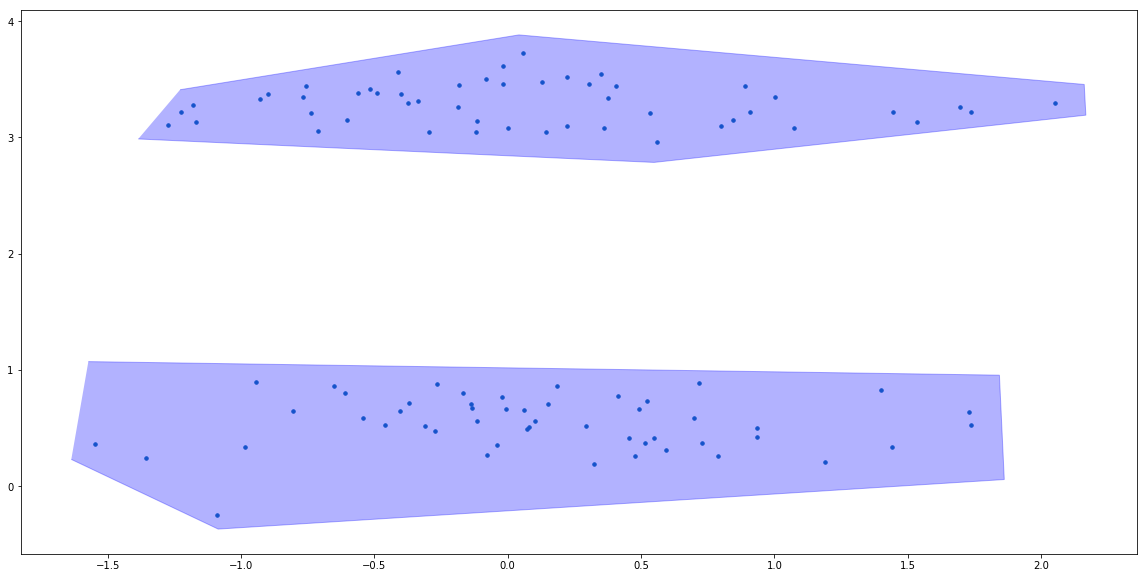

In [3]:
###
# Visualize the data and the marked clusters
###

sess, rep, X, D = load_model()

data_rep = sess.run(rep, feed_dict={X: x, D: np.zeros((1, input_dim))})

fig, ax = plt.subplots(figsize=(20, 10))
patches = []

for i in range(num_clusters):
    line = plt.Polygon(all_vertices[i], closed=False, color="blue", alpha=0.3)
    ax.add_line(line)

plt.scatter(data_rep[:, 0], data_rep[:, 1], s = 12)

plt.show()
plt.close()

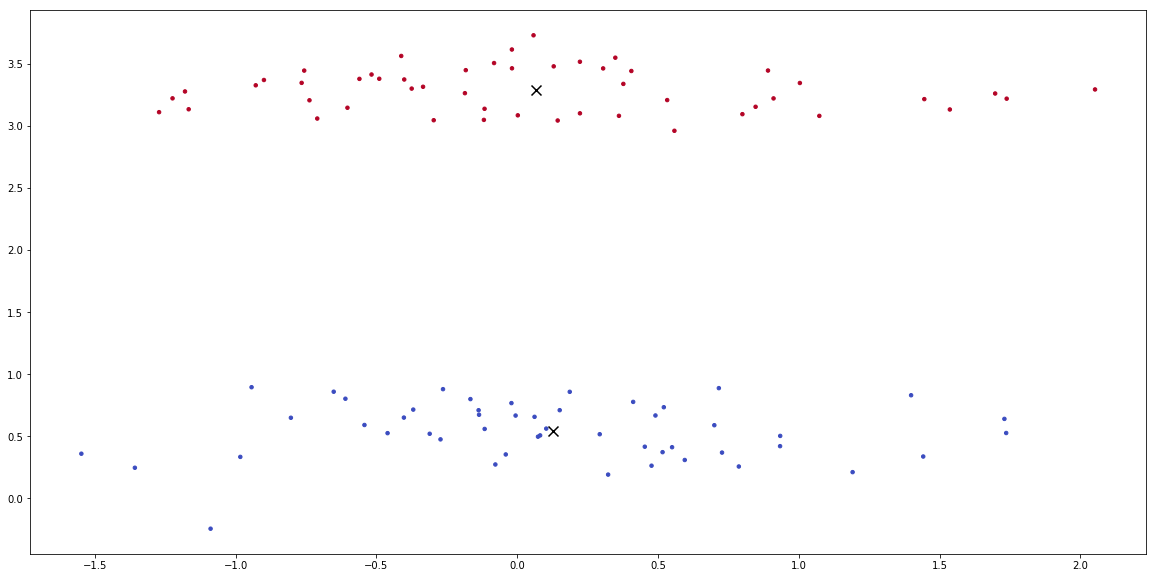

In [4]:
###
# Find the datapoints in each marked cluster
###

m = data_rep.shape[0]
cluster = -1.0 * np.ones((m))
indices = [[]] * num_clusters
centers = [[]] * num_clusters
for i in range(num_clusters):
    path = Path(all_vertices[i])
    indices[i] = []
    for j in range(m):
        if path.contains_points(data_rep[j].reshape((1,2))):
            cluster[j] = i
            indices[i].append(j)
    centers[i] = np.mean(data_rep[indices[i], :], axis = 0)
    
centers = np.array(centers)

fig, ax = plt.subplots(figsize=(20, 10))
patches = []
    
plt.scatter(data_rep[:, 0], data_rep[:, 1], s = 12, c = cluster, cmap = plt.cm.coolwarm)
plt.scatter(centers[:, 0], centers[:, 1], c = "black", marker = "x", s = 100)

plt.show()
plt.close()   

In [5]:
###
# Compute the cluster explanations
###

os.system("rm -rf explanation")
deltas = explain(load_model, x, data_rep, indices, lambda_global = 0.5, num_points = 10, learning_rate = 0.01)    


INFO:tensorflow:Restoring parameters from Model/model.cpkt
0 4.256362
2 4.107149991989136
3 3.8848887982368474
4 3.675042250967026
5 3.514735596671105
6 3.357647732461453
7 3.2312253435536866
8 3.1023431170062405
9 3.023757822639601
11 2.9844448708839755
12 2.877727712096054
13 2.7406655951451766
14 2.6910750869612254
17 2.639587925463672
18 2.6027200638560255
19 2.5312231200314583
20 2.487482293013664
21 2.393447217551409
23 2.3393593771637544
24 2.275830985013938
39 2.273006983008221
40 2.2338454133923964
41 2.187136358617793
42 2.1067027449003315
44 2.0930818598972833
45 2.0387649191773303
46 2.0075438189527124
47 1.9334180862922128
61 1.8947858448844972
63 1.8668155460732854
64 1.835853176341445
65 1.8270311329001105
66 1.8240992045313642
119 1.8157761419240668
140 1.772467153617116
975 1.765256661378338
1271 1.7469267654491927
1273 1.7429396808683382
1391 1.7329173933128836



From  0  to  1 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


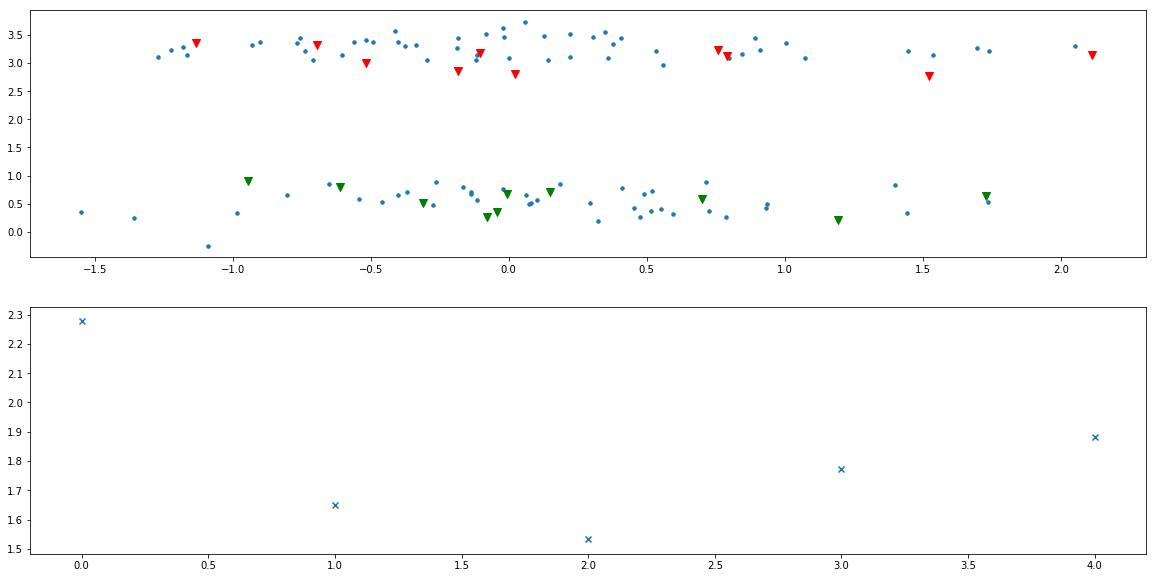


From  1  to  0 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


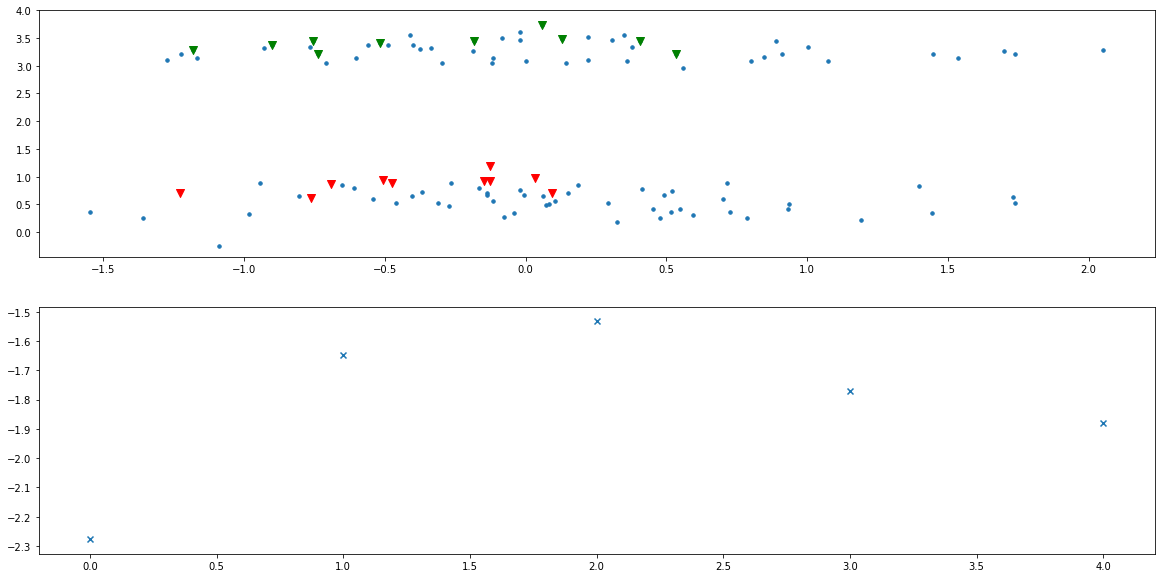

In [6]:
###
# Visualize the cluster explanations
###

def myplot(c1, c2):
    print("\nFrom ", c1, " to ", c2, "\n")
    
    if c1 == 0:
        d = deltas[c2 - 1]
    elif c2 == 0:
        d = -1.0 * deltas[c1 - 1]
    else:
        d = -1.0 * deltas[c1 - 1] + deltas[c2 - 1]
        
    apply(load_model, x, data_rep, indices, c1, np.reshape(d, (1, input_dim)), num_points = 10)
    
myplot(0, 1)
myplot(1, 0)
